# HW 05 - Taming Text

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

### Data description

The data can be found in the folder: `hillary-clinton-emails`. Detailed information about the schema can be found [here](https://www.kaggle.com/kaggle/hillary-clinton-emails). We will start of by using `pandas` to explore the size and contents of the data.

In [2]:
emails = pd.read_csv('hillary-clinton-emails/Emails.csv')
print(emails.shape)
emails.ix[:5,:11]

(7945, 22)


,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296
5,6,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,F-2015-04841,HRC_Email_296


In [5]:
emails.ix[:5,11:]

,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
5,Meet The Right Wing Extremist Behind Anti-Musl...,NaN,NaN,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


## Exercise 1

### Generate a word cloud on the raw corpus. With the help of `nltk`, implement a standard text pre-processing pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and cons (if any) of the two word clouds you generated.

So we first make a word cloud on the raw corpus without performing any pre-processing. That is, we will make a word cloud from the last column of the `emails` DataFrame - `RawText`.

In [3]:
from wordcloud import WordCloud

# concatenate the raw email text extracted from the PDFs released by the US State Department
raw_text = emails.RawText
raw_text_concat = " ".join(raw_text)

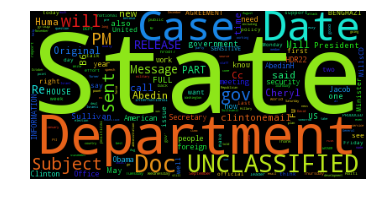

In [4]:
# Generate a word cloud image
wordcloud = WordCloud().generate(raw_text_concat)

# Display the generated image
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We will also try with the `ExtractedBodyText` and `ExtractedSubject` fields only as was discussed in the forum.

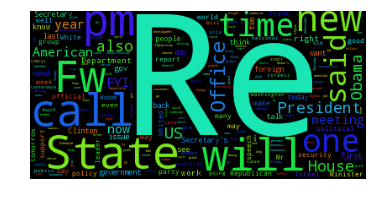

In [84]:
# concatenate extracted body and subject as a single string
extracted_body = emails.ExtractedBodyText
extracted_subj = emails.ExtractedSubject
extracted_body_concat = " ".join(extracted_body.dropna())
extracted_subj_concat = " ".join(extracted_subj.dropna())
extracted_body_subj = extracted_body_concat + " " + extracted_subj_concat

# Generate a word cloud image
wordcloud_raw = WordCloud().generate(extracted_body_subj)

# Display the generated image
plt.figure()
plt.imshow(wordcloud_raw)
plt.axis("off")
plt.show()

And a word cloud just from the `ExtractedBodyText`.

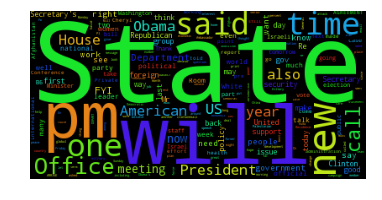

In [6]:
# Generate a word cloud image just for ExtractedBodyText
wordcloud = WordCloud().generate(extracted_body_concat)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Selecting our text source.

We will use the `ExtractedBodyText` and `ExtractedSubject` entries for our analysis because the `RawText` entries seem to include words that were not part of the original emails or metadata that is not useful for our analysis, such as: Date, Subject, gov (email extension), etc.

In [7]:
print(len(extracted_body))
print(len(extracted_body.dropna()))

7945
6742


In [8]:
print(len(extracted_subj))
print(len(extracted_subj.dropna()))

7945
6260


By using these entries, we are not dropping a significant amount of entries.

#### Text pre-processing

Now we will perform some pre-processing with `nltk` as was taught in class. We first begin with tokenization.

In [9]:
tokens_body_subj = nltk.word_tokenize(extracted_body_subj)

In [10]:
len(tokens_body_subj)

734979

Now we will perform stop word removal. We will import the standard English stop words from `nltk` and also include some stop words specific to emails.

In [32]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
local_stop = {"Re", "RE", "Fw", "FW", "Cc", "also", "PM", "AM", "pm", "am", "btw", "fyi", "FYI"}
stop_words = stop_words | local_stop

In [33]:
filtered_content = [w for w in tokens_body_subj if not w in stop_words]
len(filtered_content)

499262

Now we will perform stemming.

In [34]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [35]:
stemmed_content = [ps.stem(word) for word in filtered_content]

In [36]:
print(len(set(filtered_content)))
print(len(set(stemmed_content)))

41591
32539


Let's check out the word cloud after performing the above steps (tokenization, stop word removal, and stemming.

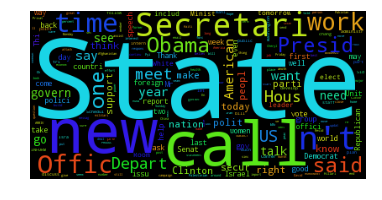

In [37]:
wordcloud = WordCloud().generate(" ".join(stemmed_content))
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We observe that we get some strange "words" due to stemming such as "secur", "Presid", and "Secretari". While this may be alright for those examples, it could be that two unrelated words are stemmed.

For this reason, we will use Lemmatization which actually gives words and to (more safely) avoid a stem for two (or more) unrelated words.

In [38]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_content = [lemmatizer.lemmatize(word) for word in filtered_content]

In [39]:
print(len(set(filtered_content)))
print(len(set(lemmatized_content)))

41591
39266


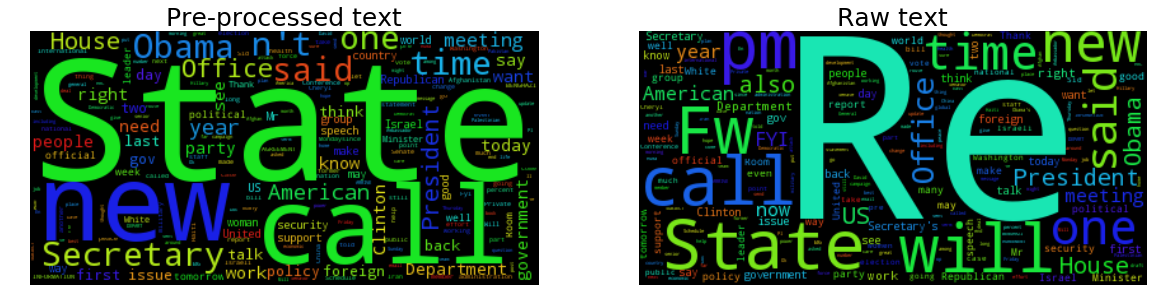

In [95]:
wordcloud_proc = WordCloud().generate(" ".join(lemmatized_content))
# plt.figure()
# plt.imshow(wordcloud_proc)
# plt.axis("off")
# plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_proc)
plt.title('Pre-processed text', fontsize=25)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_raw)
plt.title('Raw text', fontsize=25)
plt.axis("off")

plt.show()

When comparing this newly generated word cloud ("Pre-processed text") with the one from the raw `ExtractedBodyText` and `ExtractedSubject` entries ("Raw text"), we observe the following pros (+) and cons (-):

_Raw word cloud: <br>_
\+ No bias from our side in removing words <br>
\- Words that are unrepresentative of the content may overshadow the more "interesting" ones (e.g. "Re" and "Fw" have a lot of occurences) <br>

_Pre-processed word cloud: <br>_
\+ Seems to be more representative of the content as certain stop words are removed <br>
\- When using stemming, you may obtain words that are not really words OR two (or more) unrelated words may be stemmed as one (which is why we chose to use Lemmatization) <br>
\- During pre-processing, we may introduce some bias when parsing / removing text

## Exercise 2

### Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (HINT: remember that there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.) Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level) that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo methods from the sentiment analysis module -- can you find substantial differences?

We checked out the `nltk.sentiment.util` module and found two useful demos for sentiment analysis:

* demo_vader_instance
* demo_liu_hu_lexicon

These methods print the result instead of returning the polarity information so we will write our own functions.

In [62]:
# vader sentimanet analysis
from nltk.sentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer() # so we don't need to keep creating a new object

def sentiment_vader(text):
    return sid.polarity_scores(text)    

In [67]:
# liu hu lexicon sentiment analysis
# adapted from http://www.nltk.org/_modules/nltk/sentiment/util.html - demo_liu_hu_lexicon
from nltk.corpus import opinion_lexicon
from nltk.tokenize import treebank
tokenizer = treebank.TreebankWordTokenizer()

def sentiment_liu_hu(text):
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
        elif word in opinion_lexicon.negative():
            neg_words += 1

    if pos_words > neg_words:
        return 1
    elif pos_words < neg_words:
        return -1
    elif pos_words == neg_words:
        return 0

However, assigning only positive / negative sentiment (`sentiment_liu_hu`) may be too rash so we modified the above function to instead return the ratio of positive, negative, and neutral words.

In [76]:
# assigning only positive and negative may be too rash, we should somehow take into account the number 
# of words and the difference between the number of positive words and the number of negative words
def sentiment_liu_hu_mod(text):
    pos_words = 0
    neg_words = 0
    neu_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
        elif word in opinion_lexicon.negative():
            neg_words += 1
        else:
            neu_words += 1
            
    results = {"neg_word_ratio": round(neg_words/len(tokenized_sent),3), 
               "neu_word_ratio": round(neu_words/len(tokenized_sent),3), 
               "pos_word_ratio": round(pos_words/len(tokenized_sent),3)}
    return results

### Simple example

Let's try a couple examples, taken from `nltk`'s page (http://www.nltk.org/howto/sentiment.html).

In [65]:
sentences = ["VADER is smart, handsome, and funny.", 
             "A really bad, horrible book.",
            "The plot was good, but the characters are uncompelling and the dialog is not great."]

In [77]:
for sentence in sentences:
    print(sentence)
    print(sentiment_vader(sentence))
    print(sentiment_liu_hu(sentence))
    print(sentiment_liu_hu_mod(sentence))

VADER is smart, handsome, and funny.
{'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
1
{'pos_word_ratio': 0.222, 'neg_word_ratio': 0.111, 'neu_word_ratio': 0.667}
A really bad, horrible book.
{'neg': 0.791, 'neu': 0.209, 'pos': 0.0, 'compound': -0.8211}
-1
{'pos_word_ratio': 0.0, 'neg_word_ratio': 0.286, 'neu_word_ratio': 0.714}
The plot was good, but the characters are uncompelling and the dialog is not great.
{'neg': 0.327, 'neu': 0.579, 'pos': 0.094, 'compound': -0.7042}
1
{'pos_word_ratio': 0.118, 'neg_word_ratio': 0.059, 'neu_word_ratio': 0.824}


### Sentiment analysis on emails

Go through each for of DataFrame and check Subject and Body for country and corresponding sentiment.